In [ ]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Carga de datos
df = pd.read_csv('datos.csv', encoding='latin1')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166684 entries, 0 to 166683
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   ANIO                166684 non-null  int64 
 1   PROVINCIA           166684 non-null  object
 2   CANTON              166684 non-null  object
 3   FECHA               166684 non-null  object
 4   HORA                166684 non-null  object
 5   TIPO_DE_SINIESTRO   166684 non-null  object
 6   TIPO_DE_VEHICULO_1  166684 non-null  object
 7   EDAD_1              166684 non-null  int64 
 8   SEXO_1              166684 non-null  object
 9   CONDICION_1         166684 non-null  object
 10  CASCO_1             166684 non-null  object
 11  CINTURON_1          166684 non-null  object
dtypes: int64(2), object(10)
memory usage: 15.3+ MB


In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# Seleccionar variables predictoras y objetivo
X = df[['ANIO', 'PROVINCIA', 'FECHA', 'HORA', 'TIPO_DE_SINIESTRO',
        'TIPO_DE_VEHICULO_1', 'EDAD_1', 'SEXO_1', 'CASCO_1', 'CINTURON_1']]
y = df['CONDICION_1']  # Variable objetivo

In [ ]:
# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Definir transformadores para variables numéricas y categóricas
numeric_features = ['ANIO', 'EDAD_1']
categorical_features = ['PROVINCIA', 'TIPO_DE_SINIESTRO', 'TIPO_DE_VEHICULO_1',
                        'SEXO_1', 'CASCO_1', 'CINTURON_1']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [ ]:
# Combinar transformadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
# Construir el pipeline del modelo
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


In [ ]:
# Entrenar el modelo
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['ANIO', 'EDAD_1']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PROVINCIA',
                                                   'TIPO_DE_SINIESTRO',
                                                   'TIPO_DE_VEHICULO_1',
                                                   'SEXO_1', 'CASCO_1',
                                                   'CINTURON_1'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
# Evaluar el modelo
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

                 precision    recall  f1-score   support

      FALLECIDO       0.37      0.21      0.27      2694
          ILESO       0.66      0.67      0.66      9957
      LESIONADO       0.73      0.78      0.75     17567
NO IDENTIFICADO       0.83      0.80      0.82      3119

       accuracy                           0.70     33337
      macro avg       0.65      0.62      0.63     33337
   weighted avg       0.69      0.70      0.69     33337

[[  577   384  1677    56]
 [  236  6630  2919   172]
 [  710  2876 13697   284]
 [   32   113   475  2499]]


Precision en cada pliegue: [0.6465206424169431, 0.6388194073920974, 0.6427535170540286, 0.6410526362933041, 0.6426033390908038]
Recall en cada pliegue: [0.6130292760400302, 0.6082760846807034, 0.6073765901789231, 0.6105743853820346, 0.6135253187328569]
F1-score en cada pliegue: [0.6239260524113286, 0.617740732981984, 0.6192129809345888, 0.6201923487110641, 0.6226421663424702]
Precision promedio en validación cruzada: 0.6423
Recall promedio en validación cruzada: 0.6106
F1-score promedio en validación cruzada: 0.6207


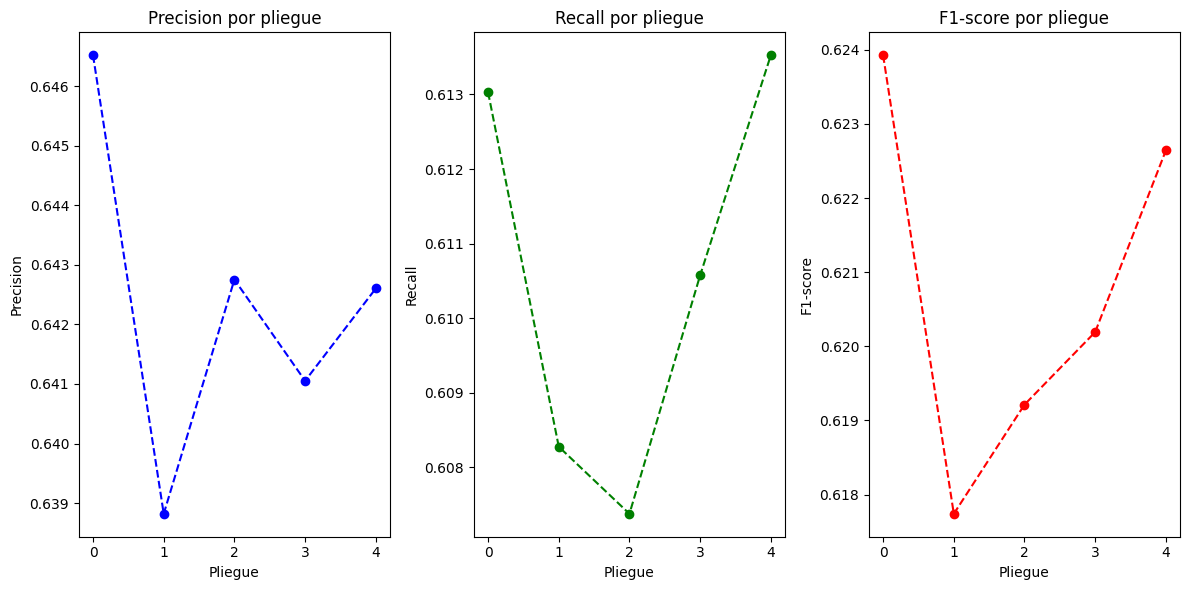

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

# Definir la función de validación cruzada personalizada
def cross_val_metrics(model, X, y, cv=5):
    skf = StratifiedKFold(n_splits=cv)
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        report = classification_report(y_test, y_pred, output_dict=True)
        labels = list(report.keys())[:-3]

        precision = np.mean([report[label]['precision'] for label in labels])
        recall = np.mean([report[label]['recall'] for label in labels])
        f1_score = np.mean([report[label]['f1-score'] for label in labels])

        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1_score)

    return precision_scores, recall_scores, f1_scores

# Realizar la validación cruzada
precision_scores, recall_scores, f1_scores = cross_val_metrics(model, X_train, y_train)

# Imprimir los resultados
print(f'Precision en cada pliegue: {precision_scores}')
print(f'Recall en cada pliegue: {recall_scores}')
print(f'F1-score en cada pliegue: {f1_scores}')
print(f'Precision promedio en validación cruzada: {np.mean(precision_scores):.4f}')
print(f'Recall promedio en validación cruzada: {np.mean(recall_scores):.4f}')
print(f'F1-score promedio en validación cruzada: {np.mean(f1_scores):.4f}')

# Graficar los resultados
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(precision_scores, marker='o', linestyle='--', color='b')
plt.title('Precision por pliegue')
plt.xlabel('Pliegue')
plt.ylabel('Precision')

plt.subplot(1, 3, 2)
plt.plot(recall_scores, marker='o', linestyle='--', color='g')
plt.title('Recall por pliegue')
plt.xlabel('Pliegue')
plt.ylabel('Recall')

plt.subplot(1, 3, 3)
plt.plot(f1_scores, marker='o', linestyle='--', color='r')
plt.title('F1-score por pliegue')
plt.xlabel('Pliegue')
plt.ylabel('F1-score')

plt.tight_layout()
plt.show()

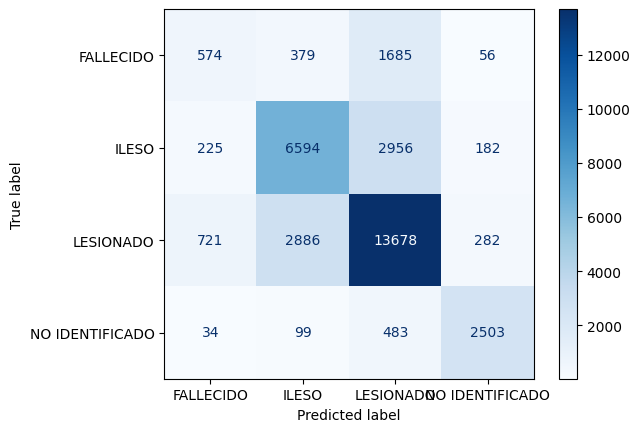

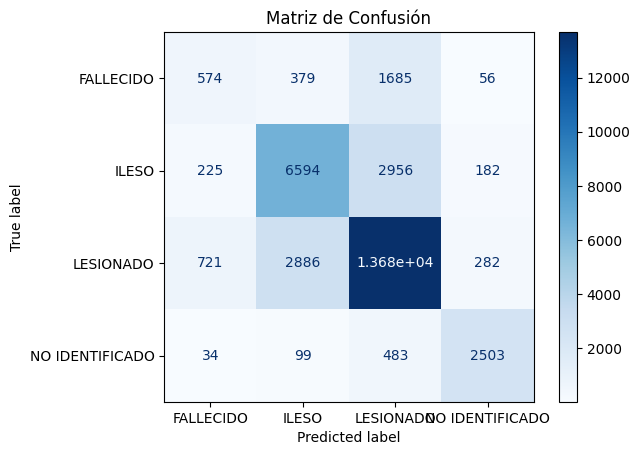

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Crear un objeto de visualización de matriz de confusión directamente desde el estimador
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)

# Mostrar la matriz de confusión
disp.plot(cmap=plt.cm.Blues, values_format='.4g')

plt.title('Matriz de Confusión')
plt.show()


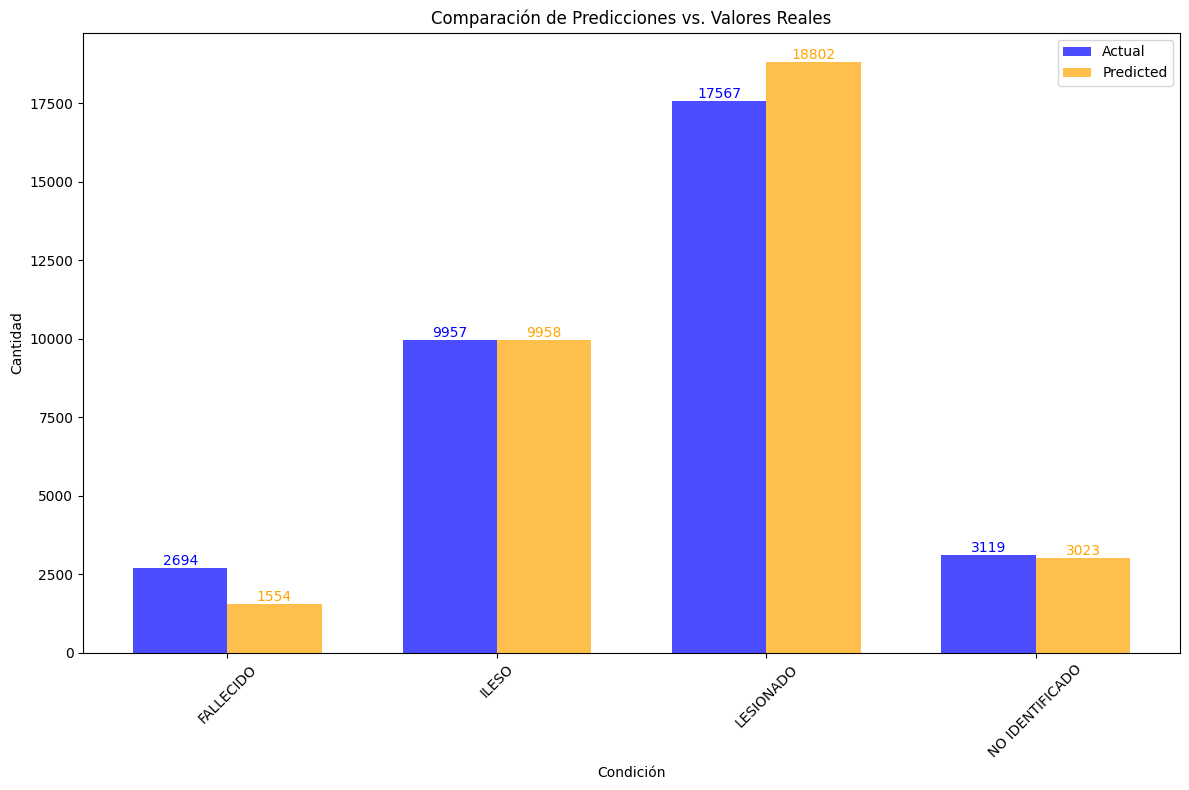

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Preparar datos para visualización
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Obtener conteos de valores
actual_counts = predictions['Actual'].value_counts().sort_index()
predicted_counts = predictions['Predicted'].value_counts().sort_index()

# Crear DataFrame para conteos
counts_df = pd.DataFrame({'Actual': actual_counts, 'Predicted': predicted_counts}).fillna(0)

# Asegurarse de que los índices sean numéricos
counts_df.index = counts_df.index.astype(str)

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear barras adyacentes
bar_width = 0.35
index = range(len(counts_df.index))

# Crear barras para 'Actual' y 'Predicted'
plt.bar([i - bar_width/2 for i in index], counts_df['Actual'], width=bar_width, color='blue', alpha=0.7, label='Actual')
plt.bar([i + bar_width/2 for i in index], counts_df['Predicted'], width=bar_width, color='orange', alpha=0.7, label='Predicted')

# Añadir etiquetas de cantidad en cada barra
for i in index:
    plt.text(i - bar_width/2, counts_df['Actual'].iloc[i] + 0.5, str(int(counts_df['Actual'].iloc[i])), ha='center', va='bottom', color='blue')
    plt.text(i + bar_width/2, counts_df['Predicted'].iloc[i] + 0.5, str(int(counts_df['Predicted'].iloc[i])), ha='center', va='bottom', color='orange')

# Etiquetas y título
plt.xlabel('Condición')
plt.ylabel('Cantidad')
plt.title('Comparación de Predicciones vs. Valores Reales')
plt.xticks(index, counts_df.index, rotation=45)
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()




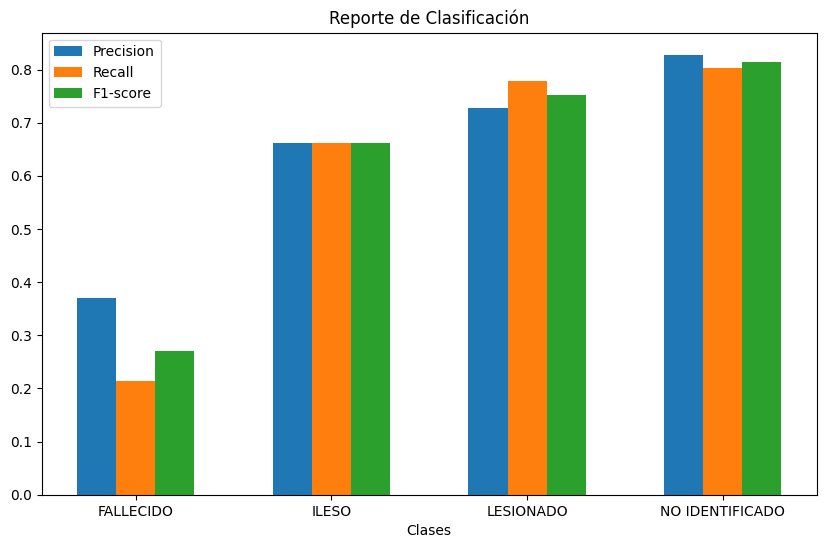

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Obtener predicciones del modelo
y_pred = model.predict(X_test)

# Obtener el reporte de clasificación
report = classification_report(y_test, y_pred, output_dict=True)

# Extraer las métricas de interés
labels = list(report.keys())[:-3]
precision = [report[label]['precision'] for label in labels]
recall = [report[label]['recall'] for label in labels]
f1_score = [report[label]['f1-score'] for label in labels]

# Plotear las métricas
fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(labels))
width = 0.2

ax.bar(x, precision, width, label='Precision')
ax.bar([i + width for i in x], recall, width, label='Recall')
ax.bar([i + 2 * width for i in x], f1_score, width, label='F1-score')

ax.set_xticks([i + width for i in x])
ax.set_xticklabels(labels)
ax.set_xlabel('Clases')
ax.set_title('Reporte de Clasificación')
ax.legend()

plt.show()
